In [142]:
#import statements
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### 1. Problem framing — target, metric, baseline you’re beating.

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

**I am going to find a correlation plot for all variables to figure out which attributes are most correlated with churn (yes/no). From there, I'll develop focused customer retention programs based on which demographics have high churn, which services the churn group have, and customer account information.**

#### 2. Data hygiene — types, missingness, outliers, leakage check; document all fixes.

In [143]:
filepath = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath)
df.dtypes # everything categorical except SeniorCitizen, tenure, and MonthlyCharges are numerical

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [144]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
# need to turn TotalCharges into numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')

In [146]:
df.dtypes # fixed - TotalCharges now float

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [147]:
df.info() # no null or missing values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [148]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

#### 3. EDA — 3–4 plots max; tie each to a hypothesis.

In [149]:
# first drop id column

df = df.drop('customerID', axis=1)

In [151]:
# categorical vars plots

num_vars = df.select_dtypes(include = 'number').columns.tolist()
cat_vars = df.select_dtypes(exclude = 'number').columns.tolist()

In [152]:
print(len(cat_vars))
cat_vars

16


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

first let's visualize distribution for categorical variables

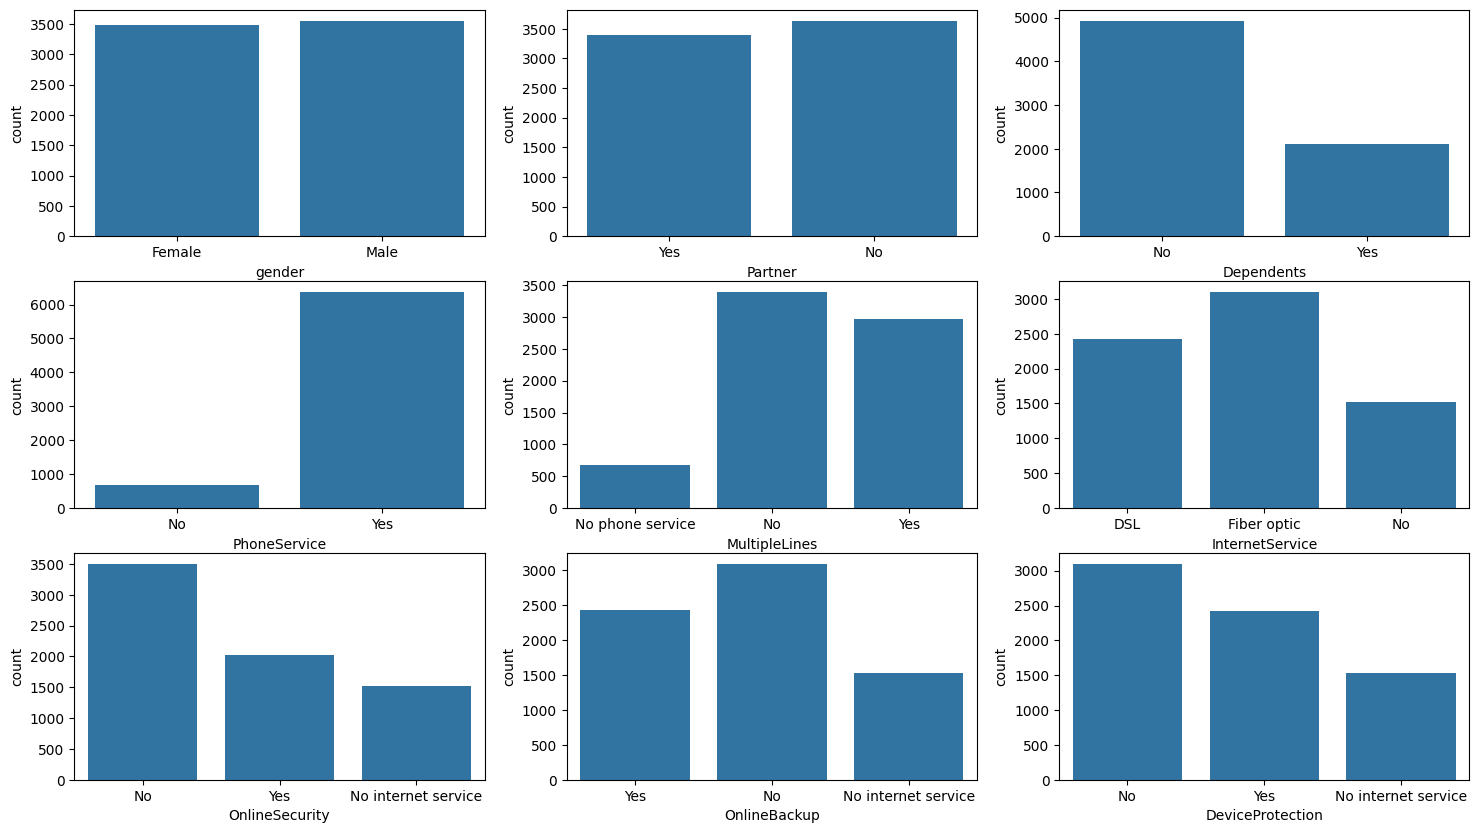

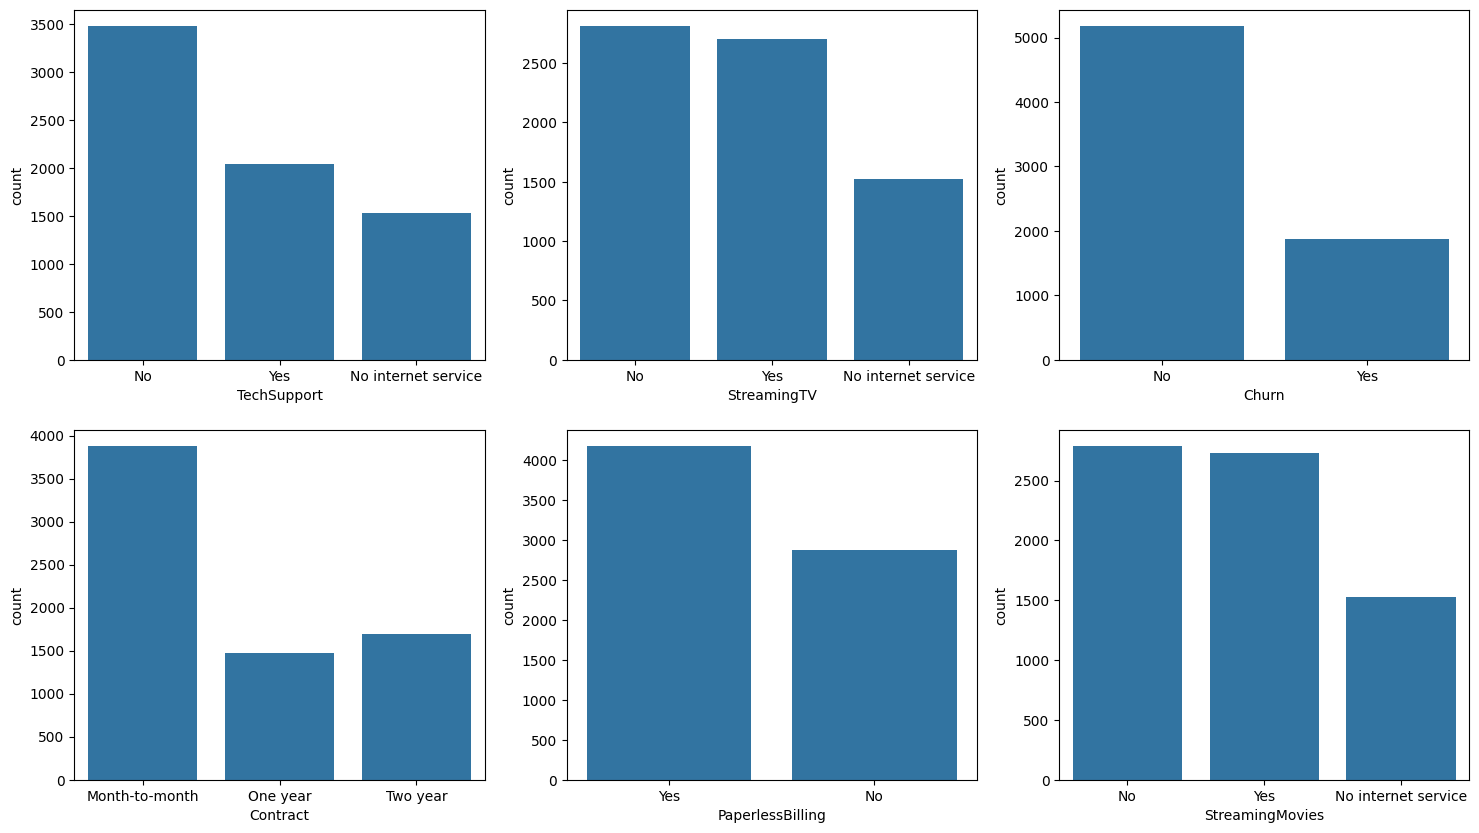

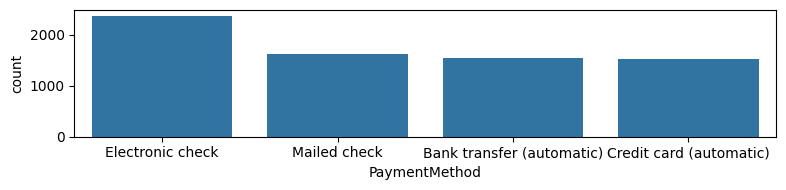

In [153]:
# categorical attributes

fig, axes = plt.subplots(figsize=(18, 10), nrows=3, ncols=3)
sns.countplot(x="gender", data=df, ax=axes[0][0])
sns.countplot(x="Partner", data=df, ax=axes[0][1])
sns.countplot(x="Dependents", data=df, ax=axes[0][2])
sns.countplot(x="PhoneService", data=df, ax=axes[1][0])
sns.countplot(x="MultipleLines", data=df, ax=axes[1][1])
sns.countplot(x="InternetService", data=df, ax=axes[1][2])
sns.countplot(x="OnlineSecurity", data=df, ax=axes[2][0])
sns.countplot(x="OnlineBackup", data=df, ax=axes[2][1])
sns.countplot(x="DeviceProtection", data=df, ax=axes[2][2])

fig2, axes2 = plt.subplots(figsize=(18, 10), nrows=2, ncols=3)
sns.countplot(x="TechSupport", data=df, ax=axes2[0][0])
sns.countplot(x="StreamingTV", data=df, ax=axes2[0][1])
sns.countplot(x="Churn", data=df, ax=axes2[0][2])
sns.countplot(x="Contract", data=df, ax=axes2[1][0])
sns.countplot(x="PaperlessBilling", data=df, ax=axes2[1][1])
sns.countplot(x="StreamingMovies", data=df, ax=axes2[1][2])

fig3, axes3 = plt.subplots(figsize=(8, 2))
sns.countplot(x="PaymentMethod", data=df, ax=axes3)
fig3.tight_layout()

proportion breakdowns to see outliers quantitatively

In [154]:
for col in cat_vars:
    display(f"{col}", df[col].value_counts(normalize=True).round(3))

'gender'

Male      0.505
Female    0.495
Name: gender, dtype: float64

'Partner'

No     0.517
Yes    0.483
Name: Partner, dtype: float64

'Dependents'

No     0.7
Yes    0.3
Name: Dependents, dtype: float64

'PhoneService'

Yes    0.903
No     0.097
Name: PhoneService, dtype: float64

'MultipleLines'

No                  0.481
Yes                 0.422
No phone service    0.097
Name: MultipleLines, dtype: float64

'InternetService'

Fiber optic    0.440
DSL            0.344
No             0.217
Name: InternetService, dtype: float64

'OnlineSecurity'

No                     0.497
Yes                    0.287
No internet service    0.217
Name: OnlineSecurity, dtype: float64

'OnlineBackup'

No                     0.438
Yes                    0.345
No internet service    0.217
Name: OnlineBackup, dtype: float64

'DeviceProtection'

No                     0.439
Yes                    0.344
No internet service    0.217
Name: DeviceProtection, dtype: float64

'TechSupport'

No                     0.493
Yes                    0.290
No internet service    0.217
Name: TechSupport, dtype: float64

'StreamingTV'

No                     0.399
Yes                    0.384
No internet service    0.217
Name: StreamingTV, dtype: float64

'StreamingMovies'

No                     0.395
Yes                    0.388
No internet service    0.217
Name: StreamingMovies, dtype: float64

'Contract'

Month-to-month    0.550
Two year          0.241
One year          0.209
Name: Contract, dtype: float64

'PaperlessBilling'

Yes    0.592
No     0.408
Name: PaperlessBilling, dtype: float64

'PaymentMethod'

Electronic check             0.336
Mailed check                 0.229
Bank transfer (automatic)    0.219
Credit card (automatic)      0.216
Name: PaymentMethod, dtype: float64

'Churn'

No     0.735
Yes    0.265
Name: Churn, dtype: float64

does not seem to be any outliers for categorical variables - no like minority values across categorical variables

In [155]:
# numerical vars plots
num_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

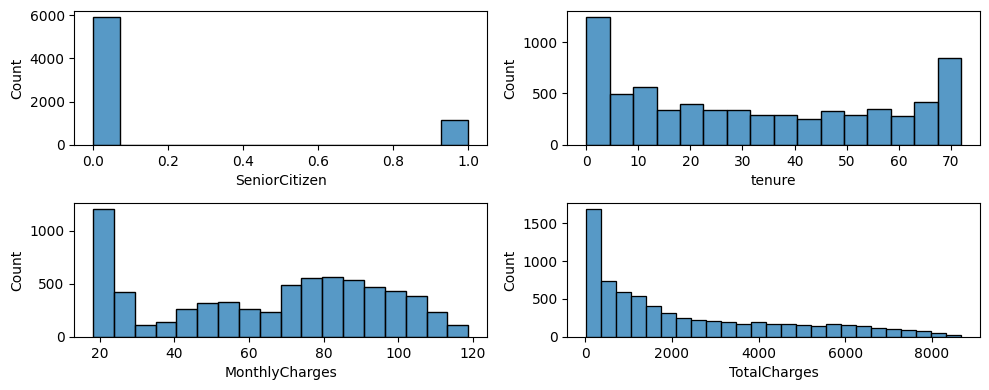

In [156]:
fig, axes = plt.subplots(figsize=(10, 4), nrows = 2, ncols = 2)
sns.histplot(x = "SeniorCitizen", data = df, ax = axes[0][0])
sns.histplot(x = "tenure", data = df, ax = axes[0][1])
sns.histplot(x = "MonthlyCharges", data = df, ax = axes[1][0])
sns.histplot(x = "TotalCharges", data = df, ax = axes[1][1])
fig.tight_layout()

numerical variables also seem normal, TotalCharges is skewed with outliers to the right so could consider cutting off but will keep for now.

now time to make correlation plot

want to convert cat into num so i can get a corr plot to see all var corr with churn

In [157]:
# gender: Male (0) Female (1)
# Partner Yes No
# Dependents Yes No
# PhoneService Yes No
# Churn Yes No
# PaperlessBilling Yes No
# Contract: Month-to-month(0)/One year(1)/Two year(2)

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1}).astype(int)
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1}).astype(int)
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1}).astype(int)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1}).astype(int)

df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2}).astype(int)

In [158]:
df.dtypes # still need to convert MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
            # DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaymentMethod
            

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [159]:
# MultipleLines: Yes, No, No phone service
# OnlineSecurity: No, Yes, No internet service
# OnlineBackup: Yes, No, No internet service
# DeviceProtection: No, Yes, No internet service
# TechSupport: No, Yes, No internet service
# StreamingTV: No, Yes, No internet service
# StreamingMovies: No, Yes, No internet service

df['MultipleLines'] = pd.Categorical(df['MultipleLines'], categories=['No phone service','No','Yes'])
df['OnlineSecurity'] = pd.Categorical(df['OnlineSecurity'], categories=['No internet service','No','Yes'])
df['OnlineBackup'] = pd.Categorical(df['OnlineBackup'], categories=['No internet service','No','Yes'])
df['DeviceProtection'] = pd.Categorical(df['DeviceProtection'], categories=['No internet service','No','Yes'])
df['TechSupport'] = pd.Categorical(df['TechSupport'], categories=['No internet service','No','Yes'])
df['StreamingTV'] = pd.Categorical(df['StreamingTV'], categories=['No internet service','No','Yes'])
df['StreamingMovies'] = pd.Categorical(df['StreamingMovies'], categories=['No internet service','No','Yes'])

to_drop_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [160]:
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines', drop_first=True)
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport', drop_first=True)
st = pd.get_dummies(df['StreamingTV'], prefix='StreamingTV', drop_first=True)
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies', drop_first=True)

df = pd.concat([df, ml, os, ob, dp, ts, st, sm], axis=1)

In [161]:
# InternetService: DSL, Fiber optic, No
# PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

df['MultipleLines'] = pd.Categorical(df['MultipleLines'], categories=['No','DSL','Fiber optic'])
df['MultipleLines'] = pd.Categorical(df['MultipleLines'], categories=['Electronic check', 'Mailed check',
                                                                      'Bank transfer (automatic)',
                                                                      'Credit card (automatic)'])

to_drop_cols += ['InternetService', 'PaymentMethod']

df = df.drop(columns = to_drop_cols)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,0,1,0,0,1,29.85,29.85,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,0,34,1,1,0,56.95,1889.50,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,0,2,1,0,1,53.85,108.15,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,0,45,0,1,0,42.30,1840.75,...,1,0,0,1,0,1,1,0,1,0
4,1,0,0,0,2,1,0,1,70.70,151.65,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,84.80,1990.50,...,1,0,0,1,0,1,0,1,0,1
7039,1,0,1,1,72,1,1,1,103.20,7362.90,...,0,1,0,1,1,0,0,1,0,1
7040,1,0,1,1,11,0,0,1,29.60,346.45,...,1,0,1,0,1,0,1,0,1,0
7041,0,1,1,0,4,1,0,1,74.40,306.60,...,1,0,1,0,1,0,1,0,1,0


In [163]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

<Axes: >

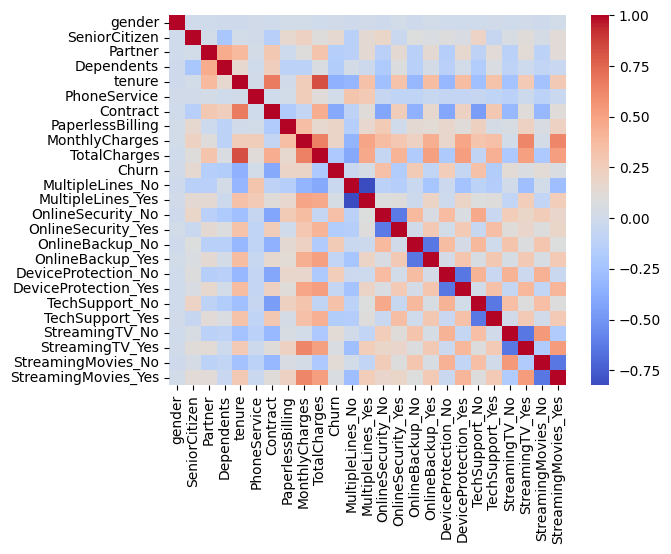

In [171]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm')

In [ ]:
corr['Churn']

gender                  0.008612
SeniorCitizen           0.150889
Partner                -0.150448
Dependents             -0.164221
tenure                 -0.352229
PhoneService            0.011942
Contract               -0.396713
PaperlessBilling        0.191825
MonthlyCharges          0.193356
TotalCharges           -0.199484
Churn                   1.000000
MultipleLines_No       -0.032569
MultipleLines_Yes       0.040102
OnlineSecurity_No       0.342637
OnlineSecurity_Yes     -0.171226
OnlineBackup_No         0.268005
OnlineBackup_Yes       -0.082255
DeviceProtection_No     0.252481
DeviceProtection_Yes   -0.066160
TechSupport_No          0.337281
TechSupport_Yes        -0.164674
StreamingTV_No          0.128916
StreamingTV_Yes         0.063228
StreamingMovies_No      0.130845
StreamingMovies_Yes     0.061382
Name: Churn, dtype: float64

# prelim biz insights from analysis

# Contract, tenure, OnlineSecurity_No, TechSupport_No all have highest correlation above 0.33 in magnitude. tenure and contract is negative and the other 2 are positive. this means
- the longer the contract or tenure, the lower to churn (makes sense) --> could promote this via like discounts/deals for curr customers on month-to-month contract or one year contract to upgrade their plan. or rewarding longterm customers or offering some incentives to odrive lifelong subscriptions (multi year deals) and advertising those campaigns/deals more.
- those who have internet but say no to online security or say no to tech support are more likely to churn/leave. this could mean that online security and tech support are good for customer satisfaction and quality of product if that maeks sense. so could offer stats about that in advertising and mayb eoffer bundle deals that make internet + online security and/or tech support cheaper than it currently is to encourage them to say yes. or having like sales reps regularly check in / send compelling ads to. could have like a grid with all featuers offered  and the price for each. ALSO could offer a deal that makes online security + tech support free or reduced price for first year or x months.

- bundles, intro discounts, upgrade paths, loyalty perks

reminder: predict behavior to retain customers. dev focused customer retention programs.

#### 4. Baseline — simple logistic/linear or heuristic.

#### 5. Models — add RF/GBM (SVM if small); justify choices.

#### 6. Validation — proper split/CV; report ROC-AUC (class) or MAE/RMSE (reg).

#### 7. Explainability — feature importance + 2–3 “so-what” insights.

#### 8. Business recs — 3 insights, 2 actions, risks, next data.

#### 9. Reproducibility — README (how to run), requirements, clear section headers.

#### 10. Communication — concise slides: Problem/Data → Baseline vs Model → Drivers → Recs.

In [ ]:
df.